<a href="https://colab.research.google.com/github/moqri/deep_cell/blob/master/CNNC/naseq2image_cnnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
folder='dendritic'
expressions_url='https://mousescexpression.s3.amazonaws.com/dendritic_cell.h5'

In [2]:
# Download the data 
!mkdir {folder}
!wget -O {folder}/exprMatrix.h5 {expressions_url}
!wget -O {folder}/genes.txt https://raw.githubusercontent.com/xiaoyeye/CNNC/master/data/sc_gene_list.txt

--2020-02-15 01:32:54--  https://mousescexpression.s3.amazonaws.com/dendritic_cell.h5
Resolving mousescexpression.s3.amazonaws.com (mousescexpression.s3.amazonaws.com)... 52.217.32.204
Connecting to mousescexpression.s3.amazonaws.com (mousescexpression.s3.amazonaws.com)|52.217.32.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 675899084 (645M) [application/x-www-form-urlencoded]
Saving to: ‘dendritic/exprMatrix.h5’

dendritic/exprMatri 100%[===================>] 644.59M  47.3MB/s    in 14s     

2020-02-15 01:33:09 (45.8 MB/s) - ‘dendritic/exprMatrix.h5’ saved [675899084/675899084]

--2020-02-15 01:33:09--  https://raw.githubusercontent.com/xiaoyeye/CNNC/master/data/sc_gene_list.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291

In [0]:
import numpy as np
import pandas as pd
import h5py

In [4]:
genes= pd.read_table(folder+"/genes.txt",index_col=1,header=None,names=['gene', 'id'],delimiter=' ')
genes.head()

,gene
id,
16334,ins2
19241,tmsb4x
16333,ins1
67945,rpl41
11461,actb


In [5]:
expression_df = pd.read_hdf(folder+"/exprMatrix.h5",index_col=0)
expression_df.index.rename('cell_id',inplace=1)
expression_df.shape

(4126, 20463)

In [6]:
gene_names=[genes['gene'].ix[id] for id in expression_df.columns.values]
expression_df.columns=gene_names

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [7]:
expression_df.head()

,zglp1,vmn2r65,gm10024,oog3,ldlrap1,mdn1,ifi208,wfdc17,mfap1b,tmsb15b2,bc100530,gm15114,vmn1r223,umad1,dnajc3,fam129c,rsph3b,rnaset2a,fam174b,spink13,apela,gm10767,prcd,7420461p10rik,cep85l,gm10406,bc117090,olfr55,olfr239,btnl1,isg15,gm16387,defa30,vmn2r121,loc100038947,mup9,gm1979,gm1993,mup10,mup11,...,stard7,cercam,anapc2,ssx2ip,tm9sf4,hrh3,commd7,garnl3,zscan29,dnajc24,arfgef2,cul4a,sall4,abtb2,golga2,duox1,magi3,dnttip2,wdr47,usp53,olfml3,fgg,dpyd,adgrl2,4933434e20rik,eps8l3,clca4a,tchh,sec24b,ankrd50,clca4b,cept1,taf13,kcnc4,tmem56,arfip1,prmt6,ifi44,tiparp,kdm1a
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSE48968_GSM1189043_SRR935907,0.000000,0.0,0.0,0.0,0.000000,0.021149,0.099963,5550.873212,0.000000,0.0,0.0,0.000000,0.0,9.265009,15.460175,0.0,1.666426,67.126252,0.0,0.0,0.0,0.0,0.0,0.000000,0.292417,0.0,0.0,0.0,0.0,0.0,22.549960,0.850411,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,3.002395,0.199248,9.854028,0.000000,9.381185,0.0,0.000000,0.0,1.478695,4.768447,0.164827,0.389458,0.0,0.000000,0.591914,0.228469,0.199586,10.624149,2.689515,0.00000,0.0,0.266115,0.000000,0.158590,24.345290,0.0,0.382131,0.000000,10.188531,2.338631,0.063689,80.015987,23.724416,0.0,0.0,48.025297,0.0,0.000000,78.227920,0.067654
GSE48968_GSM1189045_SRR935909,0.000000,0.0,0.0,0.0,0.000000,0.028580,0.180114,8742.533195,4.106672,0.0,0.0,0.000000,0.0,0.000000,8.441251,0.0,41.217021,12.135940,0.0,0.0,0.0,0.0,0.0,0.000000,4.346736,0.0,0.0,0.0,0.0,0.0,5.242644,0.000000,0.0,0.0,1.218881,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.497147,0.0,0.000000,0.0,0.000000,0.000000,2.019498,1.684142,0.0,1.659542,0.639906,0.000000,0.000000,0.000000,3.922925,0.00000,0.0,0.000000,0.103823,12.430027,21.370283,0.0,0.573770,0.000000,37.352788,1.915338,0.000000,0.000000,0.000000,0.0,0.0,7.003484,0.0,0.125666,27.948567,0.000000
GSE48968_GSM1189047_SRR935911,0.000000,0.0,0.0,0.0,0.000000,0.184533,0.000000,10373.409195,0.701884,0.0,0.0,0.000000,0.0,14.628159,3.474553,0.0,2.379279,17.132591,0.0,0.0,0.0,0.0,0.0,0.000000,1.275712,0.0,0.0,0.0,0.0,0.0,0.634693,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,9.561700,0.982619,0.000000,0.000000,0.0,8.822728,0.0,0.000000,3.467171,0.805371,8.427373,0.0,22.602372,0.929631,0.000000,0.139316,1.353266,0.000000,0.76918,0.0,0.000000,0.000000,0.000000,1.089331,0.0,0.000000,0.448174,5.679583,0.000000,0.000000,0.000000,0.000000,0.0,0.0,51.248802,0.0,0.000000,6.552583,0.000000
GSE48968_GSM1189048_SRR935912,0.000000,0.0,0.0,0.0,1.102037,0.334246,0.000000,10735.189490,20.033072,0.0,0.0,2.343637,0.0,10.142056,30.962625,0.0,2.176571,20.338375,0.0,0.0,0.0,0.0,0.0,1.181858,1.470451,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.023779,0.0,0.0,0.0,0.0,0.0,...,3.632568,1.145071,1.820278,0.000000,2.378535,0.0,34.338673,0.0,0.000000,0.000000,0.757805,9.624295,0.0,4.962411,0.000000,0.000000,0.917615,2.228348,5.152194,0.00000,0.0,0.000000,0.331152,0.455707,23.318638,0.0,1.098050,0.000000,5.150518,16.494622,0.000000,17.091772,0.000000,0.0,0.0,3.971227,0.0,0.000000,14.643270,1.166414
GSE48968_GSM1189049_SRR935913,5.884803,0.0,0.0,0.0,0.000000,0.000000,0.156472,5089.802416,114.583994,0.0,0.0,0.000000,0.0,4.143567,1.833315,0.0,2.608450,20.371195,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,26.188372,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.155941,0.330524,1.804894,5.182706,0.0,0.000000,0.0,0.000000,0.000000,2.580030,0.121924,0.0,0.180214,1.019173,0.000000,0.000000,35.566227,0.000000,0.00000,0.0,0.000000,0.000000,0.124120,0.000000,0.0,0.996915,0.000000,19.122918,2.662292,0.000000,0.000000,0.000000,0.0,0.0,29.745039,0.0,0.218342,4.058339,0.000000


In [8]:
expression_df=expression_df.loc[:, (expression_df != expression_df.iloc[0]).any()]  # remove constant columns
expression_df.shape

(4126, 20446)

In [9]:
expression_df=expression_df[(expression_df.T != 0).any()] # remove rows of zeros
expression_df.shape

(4124, 20446)

In [10]:
# drop low count genes
gene_count=expression_df.astype(bool).sum(axis=0)
cells=expression_df.count()
expression_df=expression_df[gene_count[gene_count>cells/10].index]
expression_df.shape

(4124, 13042)

In [11]:
expression_df.head()

,zglp1,ldlrap1,mdn1,ifi208,wfdc17,mfap1b,gm15114,umad1,dnajc3,fam129c,rsph3b,rnaset2a,fam174b,gm10767,cep85l,isg15,loc100038947,gm2012,0610010b08rik,gm2030,gm14525,gm14295,ccdc152,tmem254c,gm10058,tmem254b,gm10147,gm10096,gm10487,gm10486,gm14819,mthfsl,tgtp2,gm13306,gm15093,gm15085,tmem35b,rhox2e,ccl27b,mndal,...,znfx1,qser1,lpcat4,pomt1,osbpl6,mrps26,cep152,stard7,cercam,anapc2,tm9sf4,commd7,garnl3,zscan29,dnajc24,arfgef2,cul4a,sall4,abtb2,golga2,duox1,magi3,dnttip2,wdr47,usp53,dpyd,adgrl2,4933434e20rik,clca4a,sec24b,ankrd50,clca4b,cept1,taf13,tmem56,arfip1,prmt6,ifi44,tiparp,kdm1a
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSE48968_GSM1189043_SRR935907,0.000000,0.000000,0.021149,0.099963,5550.873212,0.000000,0.000000,9.265009,15.460175,0.0,1.666426,67.126252,0.0,0.0,0.292417,22.549960,0.000000,0.000000,0.117907,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,34.975789,0.0,0.871461,0.000000,0.000000,5.085460,0.0,0.000000,79.757389,...,0.337340,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.002395,0.199248,9.854028,9.381185,0.000000,0.0,1.478695,4.768447,0.164827,0.389458,0.0,0.000000,0.591914,0.228469,0.199586,10.624149,2.689515,0.00000,0.000000,0.158590,24.345290,0.382131,10.188531,2.338631,0.063689,80.015987,23.724416,0.0,48.025297,0.0,0.000000,78.227920,0.067654
GSE48968_GSM1189045_SRR935909,0.000000,0.000000,0.028580,0.180114,8742.533195,4.106672,0.000000,0.000000,8.441251,0.0,41.217021,12.135940,0.0,0.0,4.346736,5.242644,1.218881,0.000000,20.925806,0.000000,0.000000,17.345781,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,1.570198,0.000000,0.000000,20.440488,0.0,3.524222,94.326057,...,29.377898,0.436458,0.0,0.714048,0.114754,0.000000,0.0,0.000000,0.000000,0.000000,0.497147,0.000000,0.0,0.000000,0.000000,2.019498,1.684142,0.0,1.659542,0.639906,0.000000,0.000000,0.000000,3.922925,0.00000,0.103823,12.430027,21.370283,0.573770,37.352788,1.915338,0.000000,0.000000,0.000000,0.0,7.003484,0.0,0.125666,27.948567,0.000000
GSE48968_GSM1189047_SRR935911,0.000000,0.000000,0.184533,0.000000,10373.409195,0.701884,0.000000,14.628159,3.474553,0.0,2.379279,17.132591,0.0,0.0,1.275712,0.634693,0.000000,0.000000,1.028772,0.000000,0.000000,3.199910,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,6.826474,0.0,0.000000,22.337718,...,0.784903,0.000000,0.0,2.904556,0.000000,2.564202,0.0,0.000000,9.561700,0.982619,0.000000,8.822728,0.0,0.000000,3.467171,0.805371,8.427373,0.0,22.602372,0.929631,0.000000,0.139316,1.353266,0.000000,0.76918,0.000000,0.000000,1.089331,0.000000,5.679583,0.000000,0.000000,0.000000,0.000000,0.0,51.248802,0.0,0.000000,6.552583,0.000000
GSE48968_GSM1189048_SRR935912,0.000000,1.102037,0.334246,0.000000,10735.189490,20.033072,2.343637,10.142056,30.962625,0.0,2.176571,20.338375,0.0,0.0,1.470451,0.000000,3.023779,7.214763,3.049240,8.016403,2.404921,5.269115,0.0,5.498207,0.80164,5.498207,3.206561,5.611482,0.0,0.80164,0.80164,1.661199,0.0,0.000000,3.013165,3.013165,0.000000,0.0,0.000000,43.384238,...,0.161557,0.000000,0.0,2.960764,0.000000,31.245237,0.0,3.632568,1.145071,1.820278,2.378535,34.338673,0.0,0.000000,0.000000,0.757805,9.624295,0.0,4.962411,0.000000,0.000000,0.917615,2.228348,5.152194,0.00000,0.331152,0.455707,23.318638,1.098050,5.150518,16.494622,0.000000,17.091772,0.000000,0.0,3.971227,0.0,0.000000,14.643270,1.166414
GSE48968_GSM1189049_SRR935913,5.884803,0.000000,0.000000,0.156472,5089.802416,114.583994,0.000000,4.143567,1.833315,0.0,2.608450,20.371195,0.0,0.0,0.000000,26.188372,0.000000,0.000000,0.184559,0.000000,0.000000,0.000000,0.0,20.965550,0.00000,15.724162,0.000000,0.000000,0.0,0.00000,0.00000,3.619668,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,35.963280,...,19.801381,0.000000,0.0,18.733737,0.000000,0.000000,0.0,0.000000,0.155941,0.330524,5.182706,0.000000,0.0,0.000000,0.000000,2.580030,0.121924,0.0,0.180214,1.019173,

In [12]:
# get expression as percentage
expression_df=(100*expression_df.transpose() / expression_df.sum(1)).round(2).transpose()
expression_df

,zglp1,ldlrap1,mdn1,ifi208,wfdc17,mfap1b,gm15114,umad1,dnajc3,fam129c,rsph3b,rnaset2a,fam174b,gm10767,cep85l,isg15,loc100038947,gm2012,0610010b08rik,gm2030,gm14525,gm14295,ccdc152,tmem254c,gm10058,tmem254b,gm10147,gm10096,gm10487,gm10486,gm14819,mthfsl,tgtp2,gm13306,gm15093,gm15085,tmem35b,rhox2e,ccl27b,mndal,...,znfx1,qser1,lpcat4,pomt1,osbpl6,mrps26,cep152,stard7,cercam,anapc2,tm9sf4,commd7,garnl3,zscan29,dnajc24,arfgef2,cul4a,sall4,abtb2,golga2,duox1,magi3,dnttip2,wdr47,usp53,dpyd,adgrl2,4933434e20rik,clca4a,sec24b,ankrd50,clca4b,cept1,taf13,tmem56,arfip1,prmt6,ifi44,tiparp,kdm1a
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSE48968_GSM1189043_SRR935907,0.0,0.0,0.0,0.0,0.70,0.00,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.01,0.00,0.00,0.01,0.0,0.0,0.01,0.0
GSE48968_GSM1189045_SRR935909,0.0,0.0,0.0,0.0,1.94,0.00,0.0,0.00,0.00,0.0,0.01,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.02,...,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.01,0.0
GSE48968_GSM1189047_SRR935911,0.0,0.0,0.0,0.0,2.49,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.0
GSE48968_GSM1189048_SRR935912,0.0,0.0,0.0,0.0,3.04,0.01,0.0,0.00,0.01,0.0,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
GSE48968_GSM1189049_SRR935913,0.0,0.0,0.0,0.0,1.36,0.03,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.01,...,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE78779_GSM2076658_SRR3196081,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.00,0.01,0.0,0.07,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.02,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
GSE78779_GSM2076659_SRR3196082,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.04,0.04,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.02,0.0,0.0,0.0,0.0,0.02,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.01,0.00,0.00,0.00,0.0,0.0,0.00,0.0
GSE78779_GSM2076660_SRR3196083,0.0,0.0,0.0,0.0,0.04,0.00,0.0,0.01,0.01,0.0,0.06,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.02,0.00,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0

In [13]:
# most expressed genes
gene_sum=expression_df.sum()
top_genes=gene_sum.sort_values().tail(10)
top_genes

wfdc17      4760.48
rpl41       5189.74
ccl6        6890.84
ccl5        7005.76
ftl1        7626.61
actb        8386.07
fth1        9242.89
trim30a    13519.82
lyz2       14271.59
tmsb4x     19455.42
dtype: float64

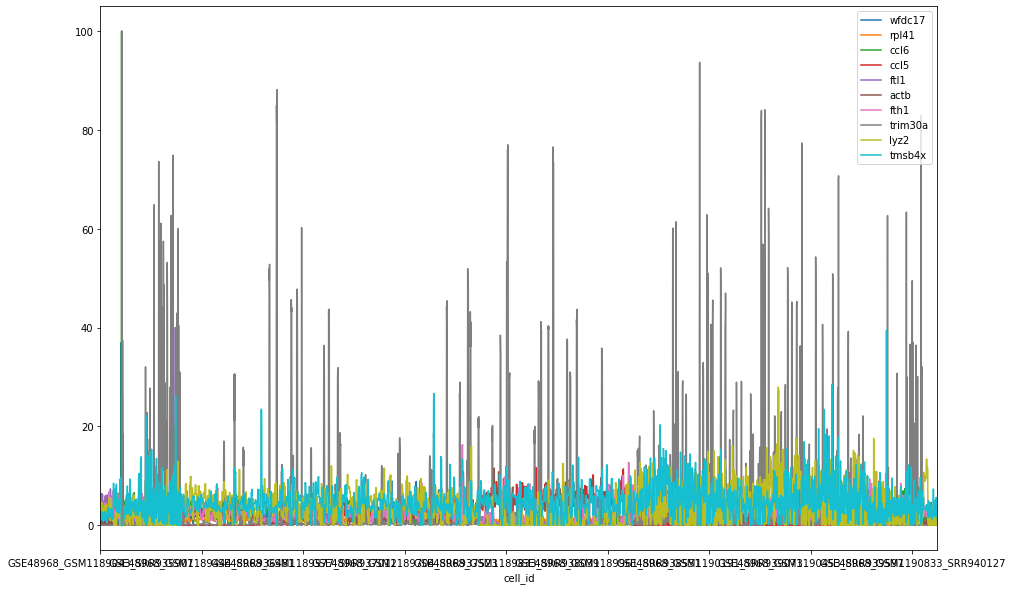

In [14]:
expression_df_top=expression_df[top_genes.index]
expression_df_top.plot(figsize=(15,10))

In [15]:
corr=expression_df_top.corr()
corr

,wfdc17,rpl41,ccl6,ccl5,ftl1,actb,fth1,trim30a,lyz2,tmsb4x
wfdc17,1.000000,0.075417,0.354581,-0.250443,0.205832,-0.277600,0.220161,-0.088777,0.406410,-0.099154
rpl41,0.075417,1.000000,0.050907,-0.065911,0.093447,0.020236,0.026617,-0.138382,-0.058898,0.377883
ccl6,0.354581,0.050907,1.000000,-0.262253,0.279162,-0.194046,0.162885,-0.121769,0.315973,-0.142215
ccl5,-0.250443,-0.065911,-0.262253,1.000000,-0.195517,0.553554,-0.034100,-0.171357,-0.339093,0.112174
ftl1,0.205832,0.093447,0.279162,-0.195517,1.000000,-0.141889,0.471407,-0.150252,0.243638,-0.115002
actb,-0.277600,0.020236,-0.194046,0.553554,-0.141889,1.000000,-0.175102,-0.171237,-0.346429,0.290495
fth1,0.220161,0.026617,0.162885,-0.034100,0.471407,-0.175102,1.000000,-0.110644,0.386761,-0.168028
trim30a,-0.088777,-0.138382,-0.121769,-0.171357,-0.150252,-0.171237,-0.110644,1.000000,-0.138098,-0.210993
lyz2,0.406410,-0.058898,0.315973,-0.339093,0.243638,-0.346429,0.386761,-0.138098,1.000000,-0.179653
tmsb4x,-0.099154,0.377883,-0.142215,0.112174,-0.115002,0.290495,-0.168028,-0.210993,-0.179653,1.000000


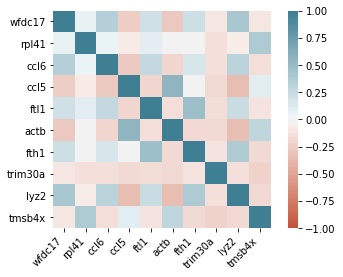

In [16]:
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
gene_a='tmsb4x'
gene_b='rpl41'

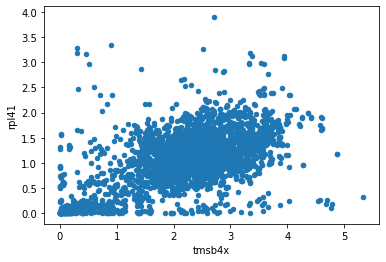

In [20]:
np.log2(expression_df_top+1).plot.scatter(gene_a,gene_b)

In [0]:
d=expression_df_top[[gene_a,gene_b]]
d=d[d[gene_a]*d[gene_b]>1]

In [0]:
x=np.log2(d+1)[gene_a].values
y=np.log2(d+1)[gene_b].values

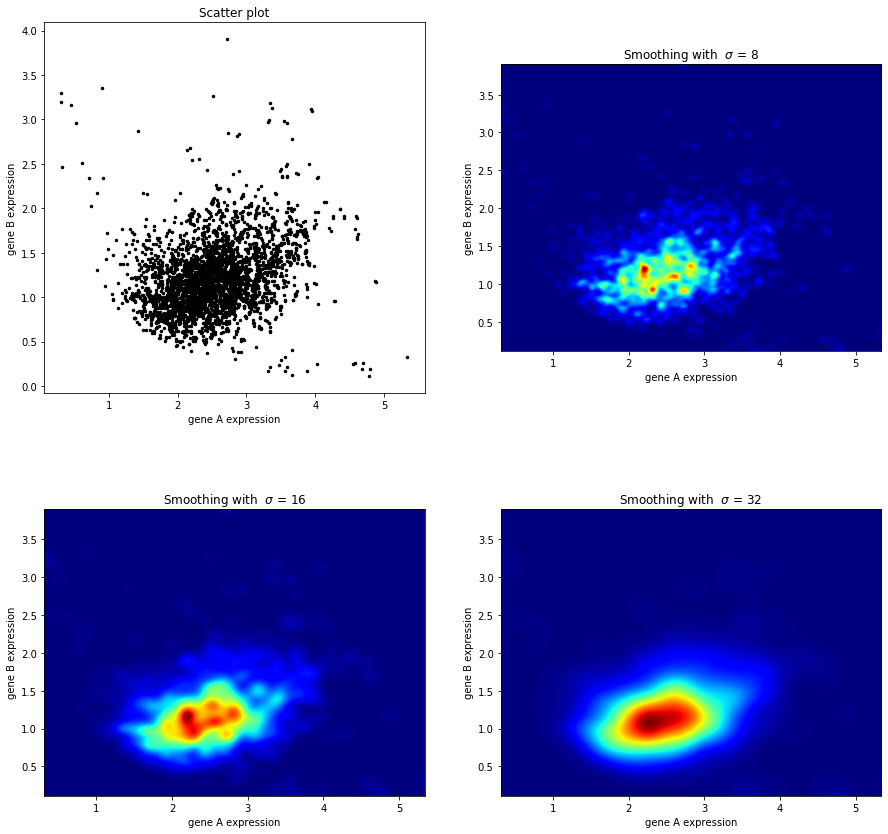

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2,figsize=(15,15))


# Generate some test data

sigmas = [0, 8, 16, 32]

for ax, s in zip(axs.flatten(), sigmas):
    ax.set(xlabel='gene A expression', ylabel='gene B expression')
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()